# 加载数据

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('../../reference_code/datasets/pima-indians-diabetes/diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [32]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X = data.values[:,:8]
y = data.values[:,8]

# 模型比较

## 1.最简单的KNN   2.加权重  3.半径

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
KNN = KNeighborsClassifier()
KNN_weight = KNeighborsClassifier(weights='distance')
KNN_radius = RadiusNeighborsClassifier(radius=1000)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [99]:
KNN.fit(X_train,y_train)
KNN_weight.fit(X_train,y_train)
KNN_radius.fit(X_train,y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=150, weights='uniform')

In [73]:
print(KNN.score(X_train,y_train),KNN.score(X_test,y_test))
print(KNN_weight.score(X_train,y_train),KNN_weight.score(X_test,y_test))
print(KNN_radius.score(X_train,y_train),KNN_radius.score(X_test,y_test))

0.7980456026058632 0.6623376623376623
1.0 0.6688311688311688
0.6824104234527687 0.6753246753246753


In [74]:
from sklearn.model_selection import cross_validate

In [96]:
KNN = KNeighborsClassifier()
KNN_weight = KNeighborsClassifier(weights='distance')
KNN_radius = RadiusNeighborsClassifier(radius=150)

In [123]:
for clf in [KNN,KNN_weight,KNN_radius]:
    a = cross_validate(clf,X,y,cv=5,return_train_score=True)['train_score'].mean()
    b = cross_validate(clf,X,y,cv=5,return_train_score=True)['test_score'].mean()
    print(a,b)

0.7975297264373296 0.723979288685171
1.0 0.7266021560139208
0.6510420804533779 0.6510482981071216


# 模型训练及分析

In [16]:
import matplotlib.pyplot as plt
from  common.utils import plot_learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
polynomialfeatures = PolynomialFeatures(degree=1)

In [18]:
KNN_Poly = Pipeline([('polynomialfeatures', polynomialfeatures), ('KNN', KNN)])
KNN_weight_Poly = Pipeline([('polynomialfeatures', polynomialfeatures), ('KNN_weight', KNN_weight)])
KNN_radius_Poly = Pipeline([('polynomialfeatures', polynomialfeatures), ('KNN_radius', KNN_radius)])

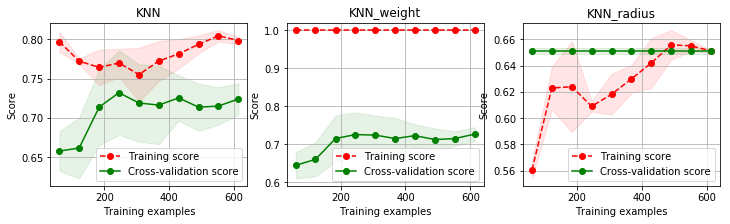

In [19]:
title = ['KNN','KNN_weight','KNN_radius']
i=0
plt.figure(figsize=(12,3))
for clf in [KNN_Poly,KNN_weight_Poly,KNN_radius_Poly]: 
#     plt.figure(figsize=(12,9))
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt,clf, title[i], X, y, cv=5,train_sizes=np.linspace(.1, 1.0, 10))
    i=i+1

# 特征选择及数据可视化

In [20]:
from sklearn.feature_selection import SelectKBest,chi2

In [27]:
Select_X = SelectKBest( k=2).fit_transform(X, y)

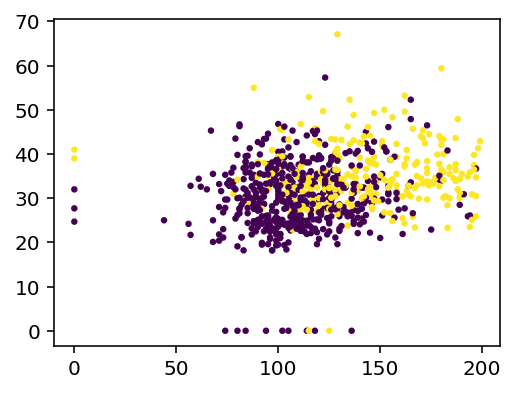

In [28]:
plt.figure(figsize=(4,3),dpi=144)
plt.scatter(Select_X[:,0],Select_X[:,1],c=y,s=5)

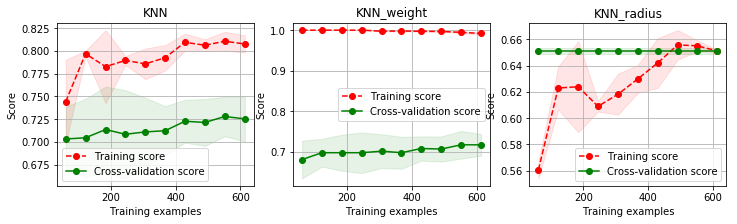

In [29]:
title = ['KNN','KNN_weight','KNN_radius']
i=0
plt.figure(figsize=(12,3))
for clf in [KNN_Poly,KNN_weight_Poly,KNN_radius_Poly]: 
#     plt.figure(figsize=(12,9))
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt,clf, title[i], Select_X, y, cv=5,train_sizes=np.linspace(.1, 1.0, 10))
    i=i+1